<a href="https://colab.research.google.com/github/Dasrunaik/AssignMents-ExcelR/blob/main/Assignment_6_MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

**Data Preprocessing**

In [2]:
df=pd.read_csv('/content/ToyotaCorolla - MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [4]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [5]:
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [7]:
df['Fuel_Type'] = df['Fuel_Type'].map({'Petrol': 0, 'Diesel': 1, 'CNG': 2})

**EDA**

**Histograms**

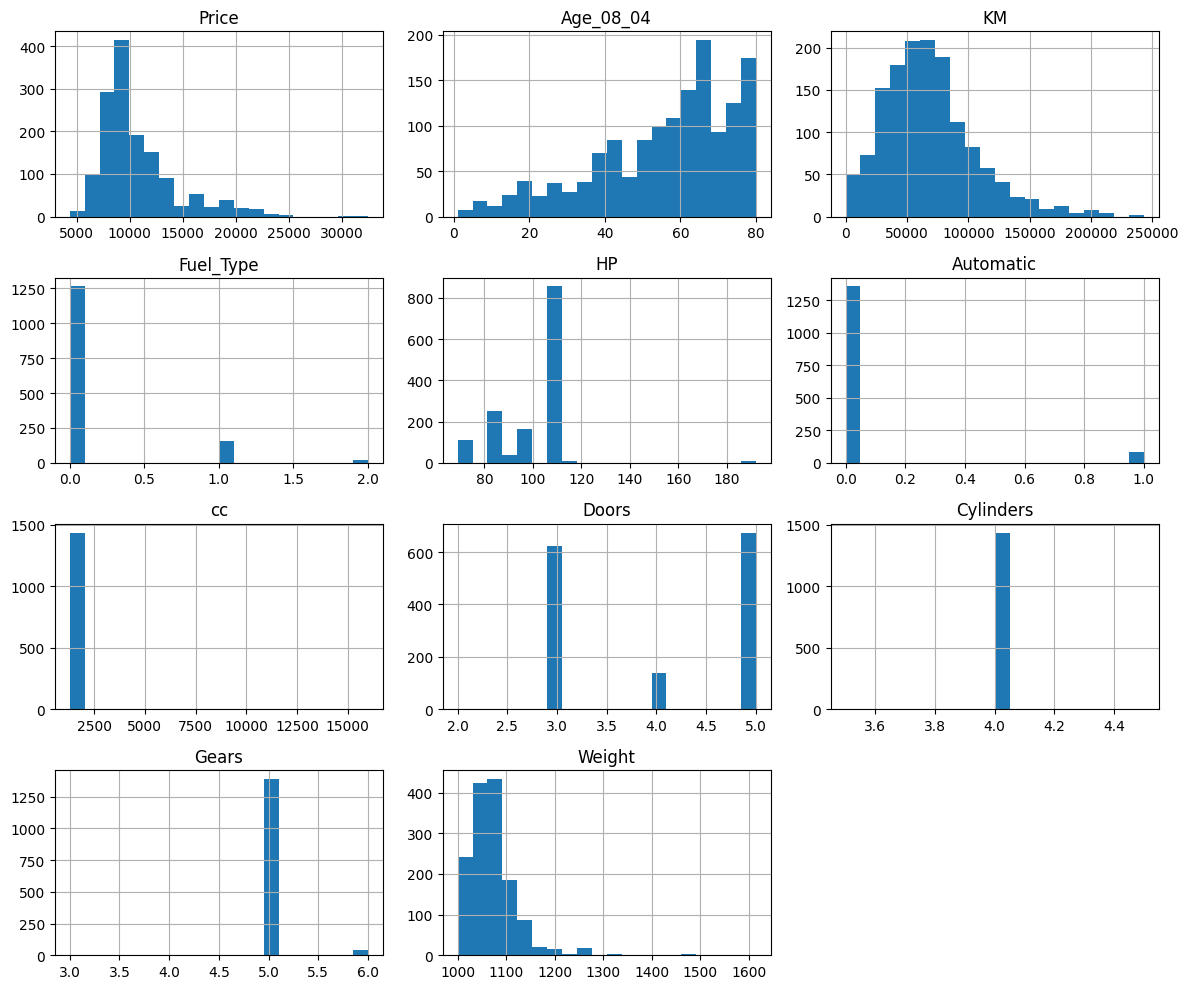

In [8]:
df.hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

**Boxplot**

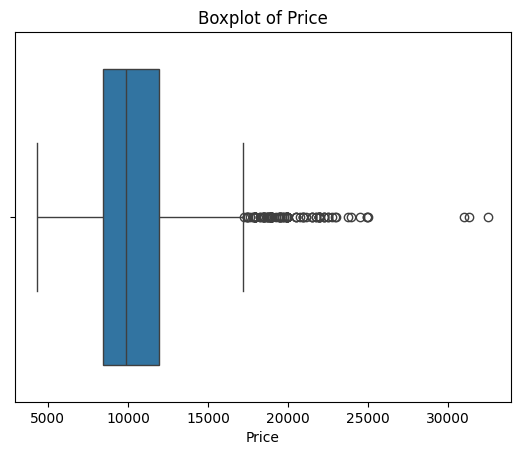

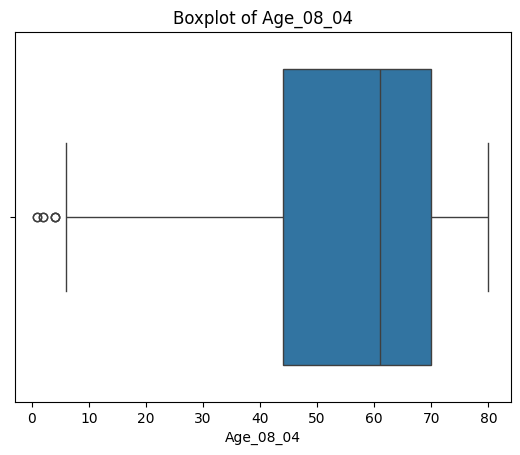

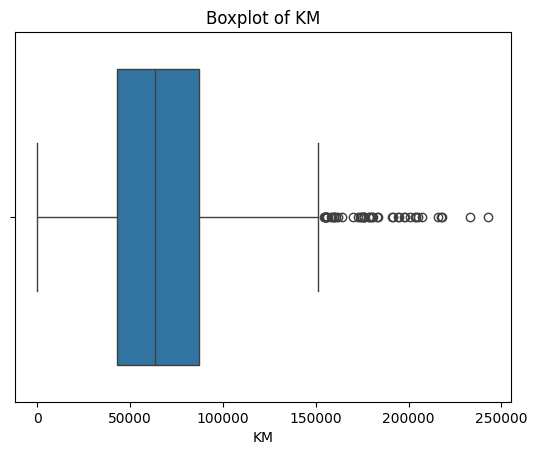

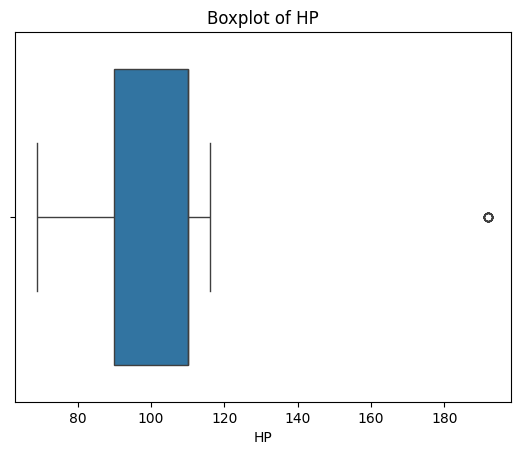

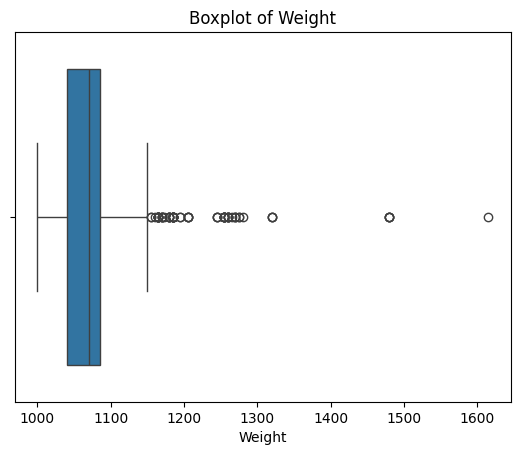

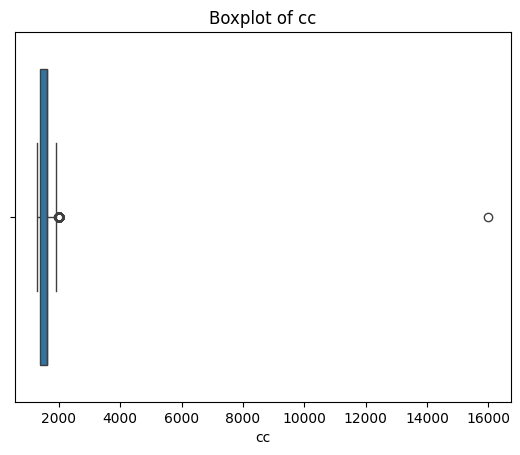

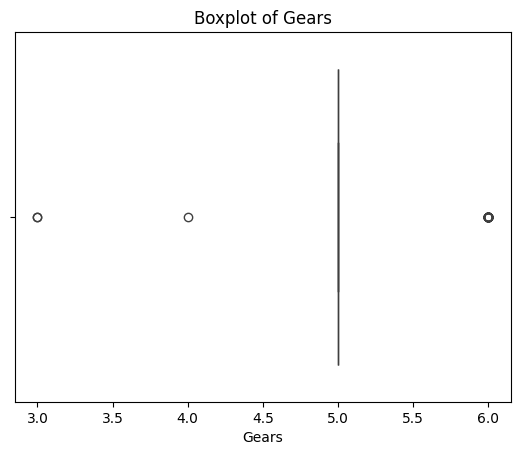

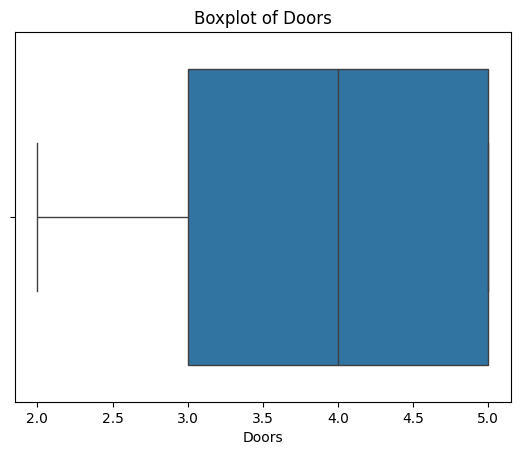

In [14]:
for col in ['Price', 'Age_08_04', 'KM', 'HP', 'Weight', 'cc', 'Gears','Doors']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

**Correlation Matrix**

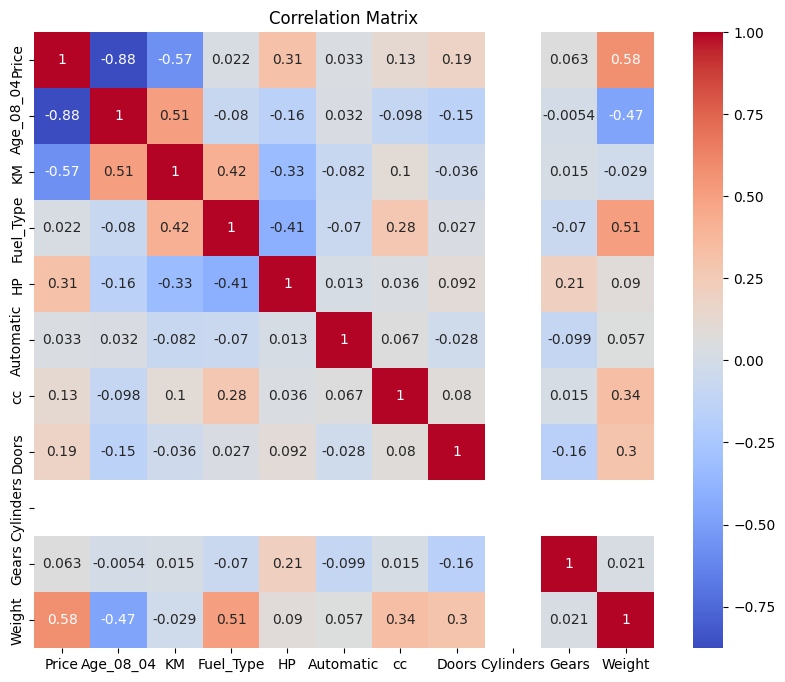

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Feature and Target Split**

In [16]:
X = df.drop('Price', axis=1)
y = df['Price']
X,y

(      Age_08_04     KM  Fuel_Type   HP  Automatic    cc  Doors  Cylinders  \
 0            23  46986          1   90          0  2000      3          4   
 1            23  72937          1   90          0  2000      3          4   
 2            24  41711          1   90          0  2000      3          4   
 3            26  48000          1   90          0  2000      3          4   
 4            30  38500          1   90          0  2000      3          4   
 ...         ...    ...        ...  ...        ...   ...    ...        ...   
 1431         69  20544          0   86          0  1300      3          4   
 1432         72  19000          0   86          0  1300      3          4   
 1433         71  17016          0   86          0  1300      3          4   
 1434         70  16916          0   86          0  1300      3          4   
 1435         76      1          0  110          0  1600      5          4   
 
       Gears  Weight  
 0         5    1165  
 1         5    

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
scaler
X_scaled


array([[-1.77196633, -0.57469494,  2.33786794, ...,  0.        ,
        -0.14042519,  1.75856113],
       [-1.77196633,  0.11745379,  2.33786794, ...,  0.        ,
        -0.14042519,  1.75856113],
       [-1.71818412, -0.71538641,  2.33786794, ...,  0.        ,
        -0.14042519,  1.75856113],
       ...,
       [ 0.80957948, -1.37403589, -0.35433604, ...,  0.        ,
        -0.14042519, -1.09191497],
       [ 0.75579727, -1.37670303, -0.35433604, ...,  0.        ,
        -0.14042519, -1.09191497],
       [ 1.0784905 , -1.82784925, -0.35433604, ...,  0.        ,
        -0.14042519,  0.78939926]])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(array([[ 0.32553964, -0.24639704, -0.35433604, ...,  0.        ,
         -0.14042519, -0.71185149],
        [ 0.64823286, -0.18577302, -0.35433604, ...,  0.        ,
         -0.14042519, -0.71185149],
        [-0.85766886, -0.79694746, -0.35433604, ...,  0.        ,
         -0.14042519,  0.14329134],
        ...,
        [ 1.29361931,  0.08552816, -0.35433604, ...,  0.        ,
         -0.14042519, -0.0467404 ],
        [ 0.37932184, -0.102505  , -0.35433604, ...,  0.        ,
         -0.14042519, -0.9968991 ],
        [ 1.29361931,  1.10597477, -0.35433604, ...,  0.        ,
         -0.14042519, -0.71185149]]),
 array([[-0.31984681, -1.2277701 , -0.35433604, ...,  0.        ,
         -0.14042519, -0.90188323],
        [ 0.64823286,  0.31719567, -0.35433604, ...,  0.        ,
         -0.14042519, -0.33178801],
        [ 0.16419302,  1.63940217,  2.33786794, ...,  0.        ,
         -0.14042519,  1.18846591],
        ...,
        [-0.85766886, -0.72530816, -0.35433604, ...,  

**Build Models**

In [25]:
model1=LinearRegression()
model1


LinearRegression()

In [26]:
model1.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred1=model1.predict(X_test)
y_pred1

array([11176.88365168,  8969.1938439 ,  9390.64915234,  8959.94241825,
       10094.01821299,  7913.49724682,  8711.31021617,  8272.4299364 ,
       14099.45852336, 13127.72764197,  9501.54591049,  9334.42692059,
       12951.90705321, 12972.83756342,  9790.64330039,  8265.25917943,
       12224.51772432, 17544.47058521,  7438.66374444,  9163.16957768,
       12709.45670685, 17800.43098183,  7897.53078219, 10411.70134794,
        7510.34559491, 16023.02765902, 10009.09251399,  7384.1061756 ,
       15660.75614251, 14492.87243282,  8163.60889331,  9721.89850261,
        8517.21387413, 10117.4453602 , 10270.74638079,  8061.1526819 ,
        8826.78990137,  9983.54452121, 16369.15247944,  9602.28333034,
        9855.55511678,  9524.19414468,  7887.04214664,  5591.09915884,
        6813.79842794, 17188.49868866,  9454.68153269, 10708.19290246,
        8717.9298301 , 13466.54920006, 12986.62729073,  6339.25682125,
       14945.71922901, 16286.20925466,  6104.08639256,  7772.71794599,
      

**All Features**

In [30]:
print("R2 Score:", r2_score(y_test, y_pred1))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred1)))
print("MAE:", mean_absolute_error(y_test, y_pred1))

R2 Score: 0.8428476112018003
RMSE: 1448.0508071258075
MAE: 992.8982858371451


**Remove Multicollinearity using VIF**

In [32]:
X_df = pd.DataFrame(X_scaled, columns=X.columns)
vif_data = pd.DataFrame()
vif_data['Feature'] = X_df.columns
vif_data['VIF'] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
print(vif_data)

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


     Feature       VIF
0  Age_08_04  1.918394
1         KM  1.946100
2  Fuel_Type  2.379914
3         HP  1.488481
4  Automatic  1.062652
5         cc  1.168921
6      Doors  1.186610
7  Cylinders       NaN
8      Gears  1.113522
9     Weight  2.327003


In [35]:
X_reduced = X_df.drop(columns=['cc'])
X_reduced

,Age_08_04,KM,Fuel_Type,HP,Automatic,Doors,Cylinders,Gears,Weight
0,-1.771966,-0.574695,2.337868,-0.768042,-0.242893,-1.085139,0.0,-0.140425,1.758561
1,-1.771966,0.117454,2.337868,-0.768042,-0.242893,-1.085139,0.0,-0.140425,1.758561
2,-1.718184,-0.715386,2.337868,-0.768042,-0.242893,-1.085139,0.0,-0.140425,1.758561
3,-1.610620,-0.547650,2.337868,-0.768042,-0.242893,-1.085139,0.0,-0.140425,1.758561
4,-1.395491,-0.801028,2.337868,-0.768042,-0.242893,-1.085139,0.0,-0.140425,1.853577
...,...,...,...,...,...,...,...,...,...
1431,0.702015,-1.279939,-0.354336,-1.035138,-0.242893,-1.085139,0.0,-0.140425,-0.901883
1432,0.863362,-1.321120,-0.354336,-1.035138,-0.242893,-1.085139,0.0,-0.140425,-1.091915
1433,0.809579,-1.374036,-0.354336,-1.035138,-0.242893,-1.085139,0.0,-0.140425,-1.091915
1434,0.755797,-1.376703,-0.354336,-1.035138,-0.242893,-1.085139,0.0,-0.140425,-1.091915


In [36]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_reduced, y, test_size=0.2, random_state=42)


In [40]:
model2=LinearRegression()
model2.fit(X_train2,y_train2)
y_pred2=model2.predict(X_test2)
y_pred2

array([11178.20460805,  8972.99505909,  9403.49192026,  8961.85318183,
       10096.28640696,  7911.25568758,  8718.22463793,  8278.51694894,
       14102.91197145, 13130.9961187 ,  9498.71021338,  9339.67138063,
       12955.40166019, 12974.39167426,  9794.48747844,  8260.29538517,
       12224.79750007, 17535.09679284,  7440.08333231,  9165.88340804,
       12718.90347716, 17802.46830033,  7901.6730348 , 10411.82894776,
        7499.62391322, 16021.22409567,  9983.21368932,  7385.76775444,
       15647.20339231, 14497.88048436,  8167.89315424,  9731.89373929,
        8519.20548046, 10123.04423904, 10276.95103968,  8064.56876086,
        8834.62396831,  9989.07186035, 16355.65353368,  9601.23566104,
        9861.94943396,  9530.19422334,  7888.37390045,  5580.14401965,
        6807.67487313, 17183.04692455,  9459.94934811, 10709.68499809,
        8713.83963832, 13470.69897548, 12994.40662657,  6333.54597671,
       14930.25611712, 16283.61597427,  6094.7007803 ,  7773.14036034,
      

**Reduced Features**

In [41]:
print("R2 Score:", r2_score(y_test2, y_pred2))
print("RMSE:", np.sqrt(mean_squared_error(y_test2, y_pred2)))
print("MAE:", mean_absolute_error(y_test2, y_pred2))

R2 Score: 0.8430935981387034
RMSE: 1446.9170633662095
MAE: 994.0758755453771


**Interpret coefficients**

In [42]:
X_sm = sm.add_constant(X_reduced)
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1142.
Date:                Sun, 15 Jun 2025   Prob (F-statistic):               0.00
Time:                        06:43:33   Log-Likelihood:                -12370.
No. Observations:                1436   AIC:                         2.476e+04
Df Residuals:                    1427   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.073e+04     35.282    304.143      0.0

**Lasso and Ridge Regression**

In [43]:
#Lasso Regression
lasso = LassoCV(cv=5)
lasso.fit(X_train, y_train)
y_lasso = lasso.predict(X_test)
print("\nLasso Regression")
print("R2 Score:", r2_score(y_test, y_lasso))


Lasso Regression
R2 Score: 0.8457820101553821


In [44]:
# Ridge Regression
ridge = RidgeCV(cv=5)
ridge.fit(X_train, y_train)
y_ridge = ridge.predict(X_test)
print("\nRidge Regression")
print("R2 Score:", r2_score(y_test, y_ridge))


Ridge Regression
R2 Score: 0.8433805579482458


**Normalization**

Normalization rescales features to a [0, 1] range.

Standardization transforms features to have zero mean and unit variance.

Helpful in models sensitive to scale, like linear regression, regularization, KNN, etc.

**Address Multicollinearity**

1)Calculate VIF and remove high VIF variables

2)Use PCA to reduce correlated features

3)Apply Lasso or Ridge regression (regularization)